In [29]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy import stats

In [30]:
df = pd.read_csv('weatherAUS.csv')

In [31]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Removing the most null value columns

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(columns=['Date'], inplace=True)
df.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'], inplace=True)

In [33]:
def outlier_detection(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 
    lower_limit = q1 - 1.5*iqr 
    upper_limit = q3 + 1.5*iqr 
    total_outlier = df[(df[col]<lower_limit) | (df[col]>upper_limit)].shape[0]
    total_datapoints = df.shape[0]
    print(f'Outlier in {col} column is {total_outlier} in percentage of {((total_outlier/total_datapoints)*100):.2f}')

cols = df.select_dtypes(include=['int', 'float']).columns
for i in cols:
    outlier_detection(i)

Outlier in MinTemp column is 49 in percentage of 0.04
Outlier in MaxTemp column is 359 in percentage of 0.27
Outlier in Rainfall column is 27081 in percentage of 20.10
Outlier in Evaporation column is 1891 in percentage of 1.40
Outlier in Sunshine column is 0 in percentage of 0.00
Outlier in WindGustSpeed column is 2896 in percentage of 2.15
Outlier in WindSpeed9am column is 1654 in percentage of 1.23
Outlier in WindSpeed3pm column is 2399 in percentage of 1.78
Outlier in Humidity9am column is 1404 in percentage of 1.04
Outlier in Humidity3pm column is 0 in percentage of 0.00
Outlier in Pressure9am column is 1233 in percentage of 0.92
Outlier in Pressure3pm column is 972 in percentage of 0.72
Outlier in Cloud9am column is 0 in percentage of 0.00
Outlier in Cloud3pm column is 0 in percentage of 0.00
Outlier in Temp9am column is 226 in percentage of 0.17
Outlier in Temp3pm column is 608 in percentage of 0.45
Outlier in Month column is 0 in percentage of 0.00
Outlier in Year column is 0 i

In [ ]:
def outlier_fixation(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 
    lower_limit = q1 - 1.5*iqr 
    upper_limit = q3 + 1.5*iqr 
    df[col] = np.where(df[col] > upper_limit, upper_limit, np.where(df[col] < lower_limit, lower_limit, df[col]))

cols = df.select_dtypes(include=['int', 'float']).columns
for i in cols:
    if i == 'Rainfall':
        continue
    outlier_fixation(i)
df = df.copy()

In [44]:
def outlier_detection(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1 
    lower_limit = q1 - 1.5*iqr 
    upper_limit = q3 + 1.5*iqr 
    total_outlier = df[(df[col]<lower_limit) | (df[col]>upper_limit)].shape[0]
    total_datapoints = df.shape[0]
    print(f'Outlier in {col} column is {total_outlier} in percentage of {((total_outlier/total_datapoints)*100):.2f}')

cols = df.select_dtypes(include=['int', 'float']).columns
for i in cols:
    outlier_detection(i)

Outlier in MinTemp column is 0 in percentage of 0.00
Outlier in MaxTemp column is 0 in percentage of 0.00
Outlier in Rainfall column is 27081 in percentage of 20.10
Outlier in Evaporation column is 0 in percentage of 0.00
Outlier in Sunshine column is 0 in percentage of 0.00
Outlier in WindGustSpeed column is 0 in percentage of 0.00
Outlier in WindSpeed9am column is 0 in percentage of 0.00
Outlier in WindSpeed3pm column is 0 in percentage of 0.00
Outlier in Humidity9am column is 0 in percentage of 0.00
Outlier in Humidity3pm column is 0 in percentage of 0.00
Outlier in Pressure9am column is 0 in percentage of 0.00
Outlier in Pressure3pm column is 0 in percentage of 0.00
Outlier in Cloud9am column is 0 in percentage of 0.00
Outlier in Cloud3pm column is 0 in percentage of 0.00
Outlier in Temp9am column is 0 in percentage of 0.00
Outlier in Temp3pm column is 0 in percentage of 0.00
Outlier in Month column is 0 in percentage of 0.00
Outlier in Year column is 0 in percentage of 0.00


In [45]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['RainTomorrow']), df['RainTomorrow'], test_size=0.2, random_state=42)

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

x_train['Rainfall_bin'] = np.nan
x_test['Rainfall_bin'] = np.nan

train_zero_mask = x_train['Rainfall'] == 0.0
train_nonzero_mask = x_train['Rainfall'] > 0.0
test_zero_mask = x_test['Rainfall'] == 0.0
test_nonzero_mask = x_test['Rainfall'] > 0.0

rainfall_binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

x_train.loc[train_zero_mask, 'Rainfall_bin'] = 0
x_test.loc[test_zero_mask, 'Rainfall_bin'] = 0

x_train.loc[train_nonzero_mask, 'Rainfall_bin'] = rainfall_binner.fit_transform(x_train.loc[train_nonzero_mask, ['Rainfall']]).flatten() + 1
x_test.loc[test_nonzero_mask, 'Rainfall_bin'] = rainfall_binner.transform(x_test.loc[test_nonzero_mask, ['Rainfall']]).flatten() + 1

x_train['Rainfall_bin'] = x_train['Rainfall_bin'].astype(int)
x_test['Rainfall_bin'] = x_test['Rainfall_bin'].astype(int)

continuous_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=1000, tol=0.001)),
    ('transformer', PowerTransformer()),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False)),
    ('imputer', KNNImputer())
])

imputation = ColumnTransformer([
    ('ContinuousPipeline', continuous_pipeline, x_train.select_dtypes(include=['int', 'float']).drop(columns=['Rainfall', 'Rainfall_bin']).columns),
    ('CategoricalPipeline', categorical_pipeline, x_train.select_dtypes(include='object').columns)
], remainder='passthrough')

x_train_trf1 = imputation.fit_transform(x_train.drop(columns=['Rainfall']))
x_test_trf1 = imputation.transform(x_test.drop(columns=['Rainfall']))

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

from sklearn.linear_model import LogisticRegression 
logr = LogisticRegression()
logr.fit(x_train_trf1, y_train_encoded)
y_pred = logr.predict(x_test_trf1)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(f'Test Accuracy: {accuracy_score(y_test_encoded, y_pred)}')
print(f'Train Accuracy: {accuracy_score(y_train_encoded, logr.predict(x_train_trf1))}')
print(confusion_matrix(y_test_encoded, y_pred))

Test Accuracy: 0.8539038147543417
Train Accuracy: 0.8549136755387741
[[19921  1141]
 [ 2796  3090]]


In [79]:
from sklearn.linear_model import LogisticRegression 
logr1 = LogisticRegression(C=10, solver='saga', tol=0.001, penalty='elasticnet', l1_ratio=0.05, max_iter=1000)
logr1.fit(x_train_trf1, y_train_encoded)
y_pred = logr1.predict(x_test_trf1)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(f'Test Accuracy: {accuracy_score(y_test_encoded, y_pred)}')
print(f'Train Accuracy: {accuracy_score(y_train_encoded, logr1.predict(x_train_trf1))}')
print(confusion_matrix(y_test_encoded, y_pred))

Test Accuracy: 0.8541264657859582
Train Accuracy: 0.8550250020873728
[[19927  1135]
 [ 2796  3090]]


In [80]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logr1, x_train_trf1, y_train_encoded, cv=10, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.85250464 0.85666574 0.85620187 0.85295482 0.85295482 0.85416087
 0.85360423 0.86167548 0.85239818 0.85063549]
Mean cross-validation score: 0.8543756145779924


<Axes: xlabel='Importance', ylabel='Feature'>

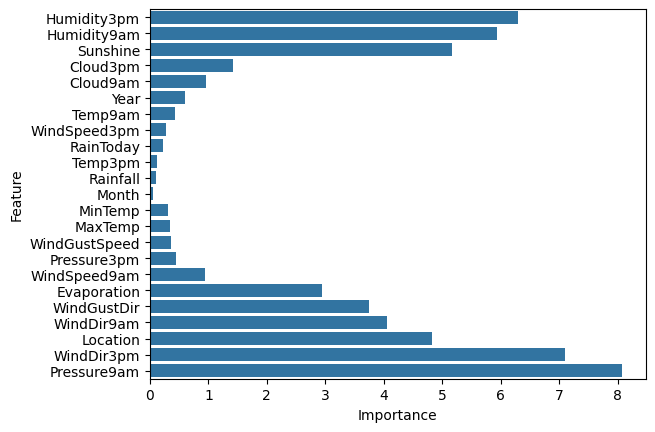

In [97]:
import pandas as pd
from collections import defaultdict
continuous_cols = x_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = x_train.select_dtypes(include='object').columns.tolist()
ohe = imputation.named_transformers_['CategoricalPipeline'].named_steps['encoder']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(continuous_cols) + list(ohe_feature_names)
feature_importances = logr1.coef_[0]  
importance_dict = defaultdict(float)

for feature_name, importance in zip(all_feature_names, feature_importances):
    if '_' in feature_name:
        original_feature = feature_name.split('_')[0]
    else:
        original_feature = feature_name
    importance_dict[original_feature] += importance

importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)
sns.barplot(y=importance_df['Feature'], x=abs(importance_df['Importance']))

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

newdf = df.copy()
newdf.drop(columns=['Month','Rainfall','Temp3pm','Year','RainToday'], inplace=True)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(newdf.drop(columns=['RainTomorrow']), newdf['RainTomorrow'], test_size=0.2, random_state=42)

continuous_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=1000, tol=0.001)),
    ('transformer', PowerTransformer()),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False)),
    ('imputer', KNNImputer())
])

imputation = ColumnTransformer([
    ('ContinuousPipeline', continuous_pipeline, x_train.select_dtypes(include=['int', 'float']).columns),
    ('CategoricalPipeline', categorical_pipeline, x_train.select_dtypes(include='object').columns)
], remainder='passthrough')

x_train_trf1 = imputation.fit_transform(x_train)
x_test_trf1 = imputation.transform(x_test)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

from sklearn.linear_model import LogisticRegression 
logr1 = LogisticRegression(C=10, solver='saga', tol=0.001, penalty='elasticnet', l1_ratio=0.05, max_iter=1000, n_jobs=-1)
logr1.fit(x_train_trf1, y_train_encoded)
y_pred = logr1.predict(x_test_trf1)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(f'Test Accuracy: {accuracy_score(y_test_encoded, y_pred)}')
print(f'Train Accuracy: {accuracy_score(y_train_encoded, logr1.predict(x_train_trf1))}')
print(confusion_matrix(y_test_encoded, y_pred))

Test Accuracy: 0.8522339320172183
Train Accuracy: 0.8533272722212429
[[19900  1162]
 [ 2820  3066]]
